# Linear Regression Assignment: Insurance Dataset

## Problem Statement
You have been provided with an **insurance dataset** that contains information about individuals, such as age, BMI, smoking status, and insurance charges. Your objective is to perform **Exploratory Data Analysis (EDA)** and build a **Linear Regression model** to predict the insurance charges based on the given features.

---


## Section 1: Data Inspection and Cleaning (10 Marks)
### Q1. Load the dataset and display the first five rows.
- Identify the columns present in the dataset.
- Check for missing values and data types.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Python/Colab Notebooks/Python EDA/insurance.csv"


Mounted at /content/drive


In [6]:
df=pd.read_csv(data_path)
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
# count of people in 18 years
df[df['age']==20].count()

,0
age,29
sex,29
bmi,29
children,29
smoker,29
region,29
charges,29


### Q2. Handle missing values and duplicates if any.
- Remove or impute missing values appropriately.
- Drop duplicate records if found.

---

In [ ]:
df.info()

NameError: name 'df' is not defined

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.shape

NameError: name 'df' is not defined

In [ ]:
# checking for any missing values
df.isna().sum().any()

np.False_

In [ ]:
#checking for null values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
##Data is already clean there are no missing values and just 1 duplicate rows in the data

In [ ]:
# drop duplicates
df.duplicated().sum()

np.int64(1)

In [ ]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
##Data is  clean as there are no missing values and no duplicates in the data

In [10]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['smoker_LabelEncoder'] = le.fit_transform(df['smoker'])
df['sex_LabelEncoder'] = le.fit_transform(df['sex'])
df['region_LabelEncoder'] = le.fit_transform(df['region'])
df.head(20)

,age,sex,bmi,children,smoker,region,charges,smoker_LabelEncoder,sex_LabelEncoder,region_LabelEncoder
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,3
1,18,male,33.770,1,no,southeast,1725.55230,0,1,2
2,28,male,33.000,3,no,southeast,4449.46200,0,1,2
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1
5,31,female,25.740,0,no,southeast,3756.62160,0,0,2
6,46,female,33.440,1,no,southeast,8240.58960,0,0,2
7,37,female,27.740,3,no,northwest,7281.50560,0,0,1
8,37,male,29.830,2,no,northeast,6406.41070,0,1,0
9,60,female,25.840,0,no,northwest,28923.13692,0,0,1


In [ ]:
df.shape

NameError: name 'df' is not defined

## Section 2: Exploratory Data Analysis (20 Marks)
### Q3. Perform Univariate Analysis on all numerical columns.
- Plot histograms and boxplots for each numerical column.
- Write your observations about the distribution of the data.


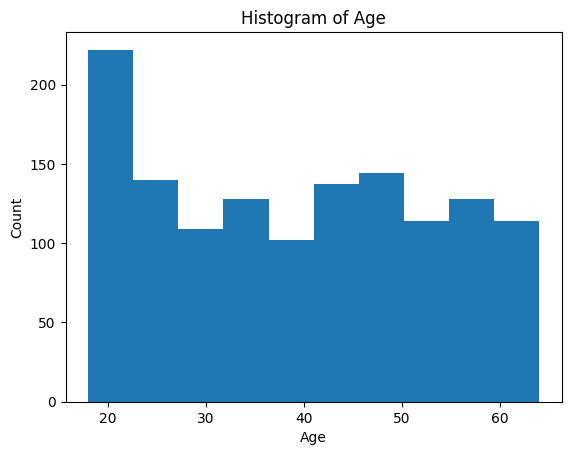

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist('age',data=df)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()

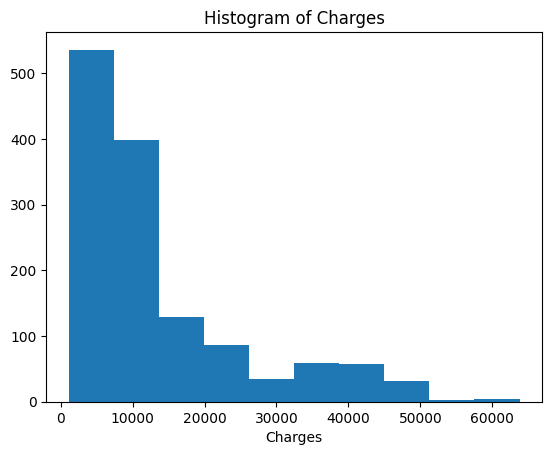

In [ ]:
plt.hist('charges',data=df)

plt.xlabel('Charges')

plt.title('Histogram of Charges')
plt.show()

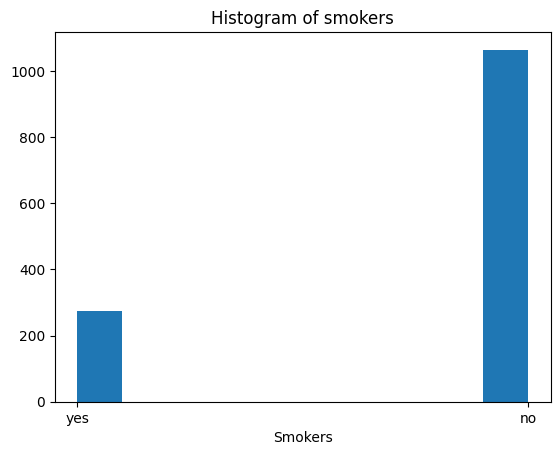

In [ ]:
plt.hist('smoker',data=df)

plt.xlabel('Smokers')

plt.title('Histogram of smokers')
plt.show()

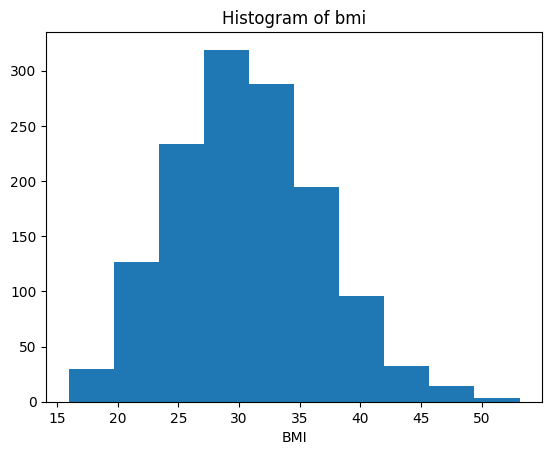

In [ ]:
plt.hist('bmi',data=df)

plt.xlabel('BMI')

plt.title('Histogram of bmi')
plt.show()

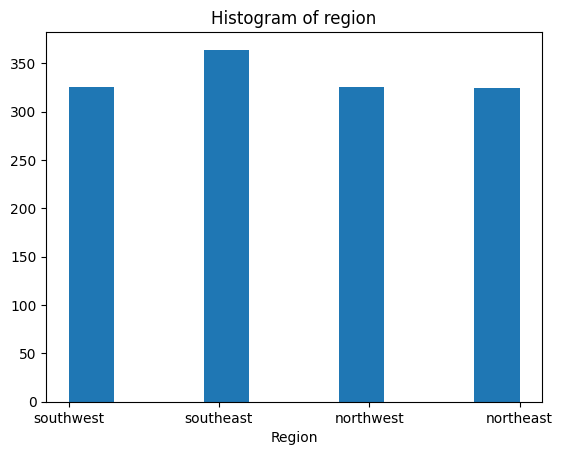

In [ ]:
plt.hist('region',data=df)

plt.xlabel('Region')

plt.title('Histogram of region')
plt.show()

<Axes: xlabel='age'>

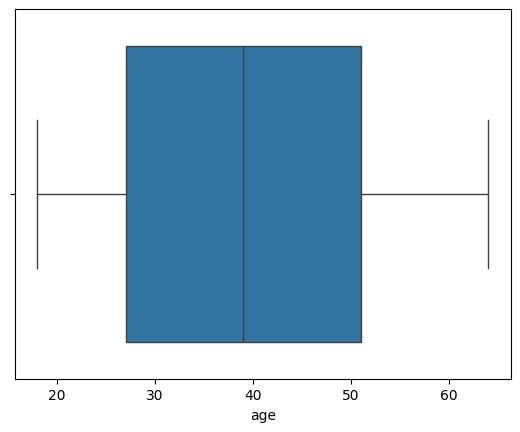

In [ ]:
sns.boxplot(data=df, x="age")

<Axes: xlabel='charges'>

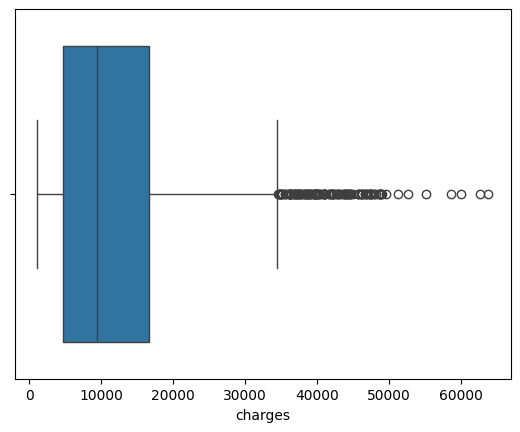

In [ ]:
sns.boxplot(data=df, x="charges")

In [ ]:
from scipy.stats import skew
skew(df['age'])

np.float64(0.054719294607049676)

In [ ]:
df['age'].describe()

,age
count,1337.000000
mean,39.222139
std,14.044333
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
df['charges'].describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


In [ ]:
#Observations:

# Age distribution is almost symmetrical i.e data points are equally distributed and no outliers
# Charges are left-skewed and there are many outliers
# Avg age of the insurers is 39 i.e most of the insurers are middle aged.
# most of the insurers age is between 27 to 51 years.
# most of the Insurance charges are between 4700 to 16000
# most of the insurers are non-smokers
# There are more insurers from southeast region


### Q4. Perform Bivariate Analysis.
- Use scatter plots to analyze relationships between independent variables and insurance charges.
- Provide insights based on your observations.

<Axes: xlabel='smoker', ylabel='bmi'>

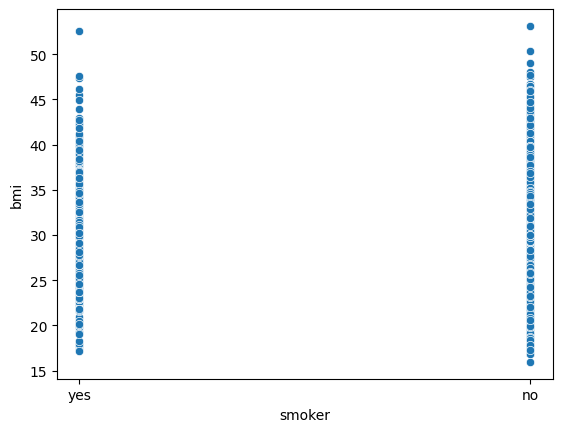

In [ ]:
#scatter plots
sns.scatterplot(x='smoker',y='bmi',data=df)

<Axes: xlabel='charges', ylabel='smoker'>

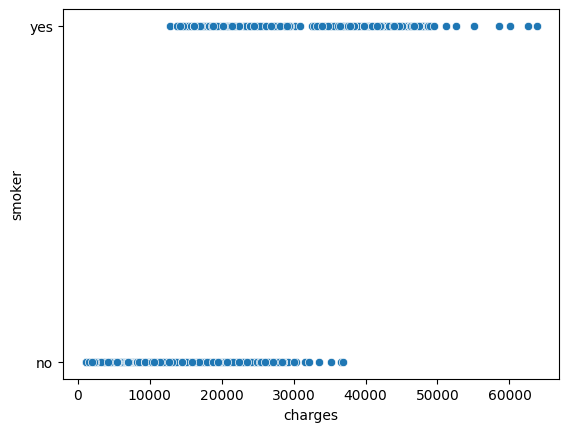

In [ ]:
#scatter plots for smoker versus charges
#sns.scatterplot(x='smoker', data=df)
#scatter plot for charges
sns.scatterplot(x='charges', y='smoker', data=df)

<Axes: xlabel='region', ylabel='bmi'>

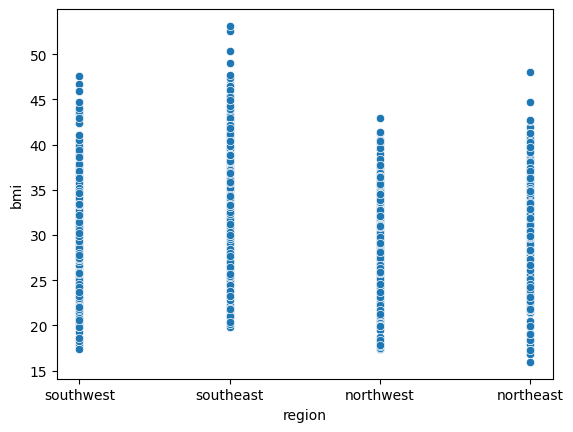

In [ ]:
#scatter plots for region versus charges

sns.scatterplot(x='region', y='bmi', data=df)

<Axes: xlabel='sex', ylabel='bmi'>

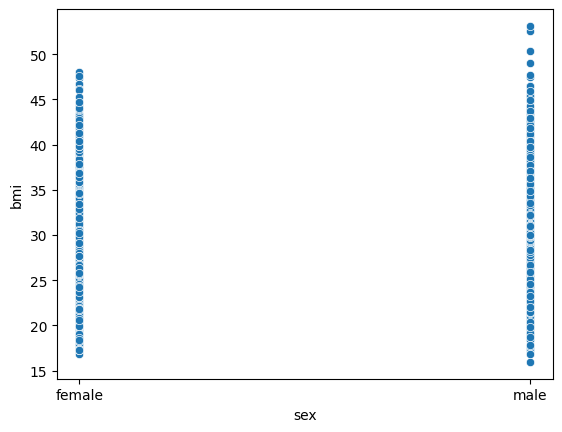

In [ ]:
#scatter plots for sex versus bmi

sns.scatterplot(x='sex', y='bmi', data=df)

In [ ]:
df['bmi'].describe()

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


In [ ]:
# obeservation
# most of the insurance charges are between 4700 to 16000
# smokers and non-smokers tend to have simialr BMI's
# BMI ranges from 26 to 34
# Insurance charges are high for smokers
# BMI is high for southeast people
# Males tends to have high BMI

### Q5. Perform Multivariate Analysis.
- Use pair plots to visualize relationships among all numerical variables.
- Write insights based on observed trends.

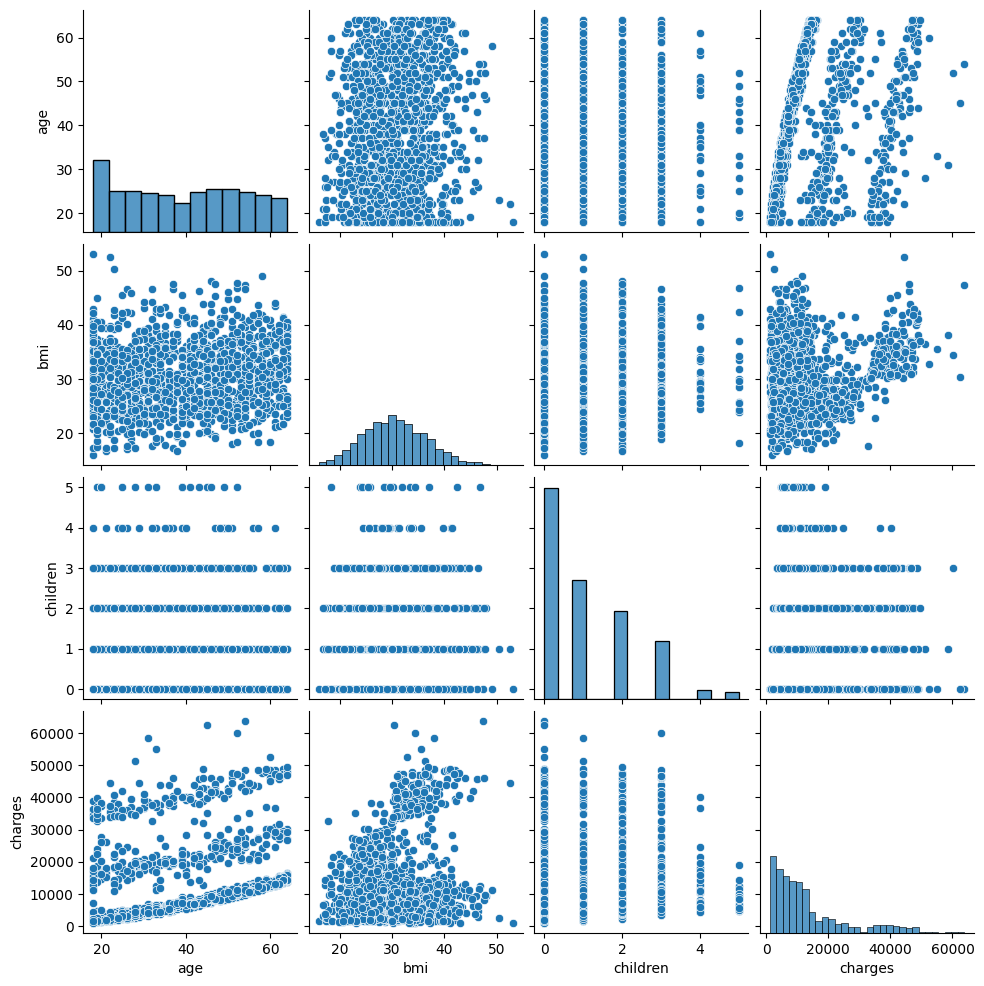

In [ ]:
#pair plots
sns.pairplot(df)

### Q6. Generate a Heatmap.
- Display the correlation matrix using a heatmap.
- Identify highly correlated features and provide interpretations.

---

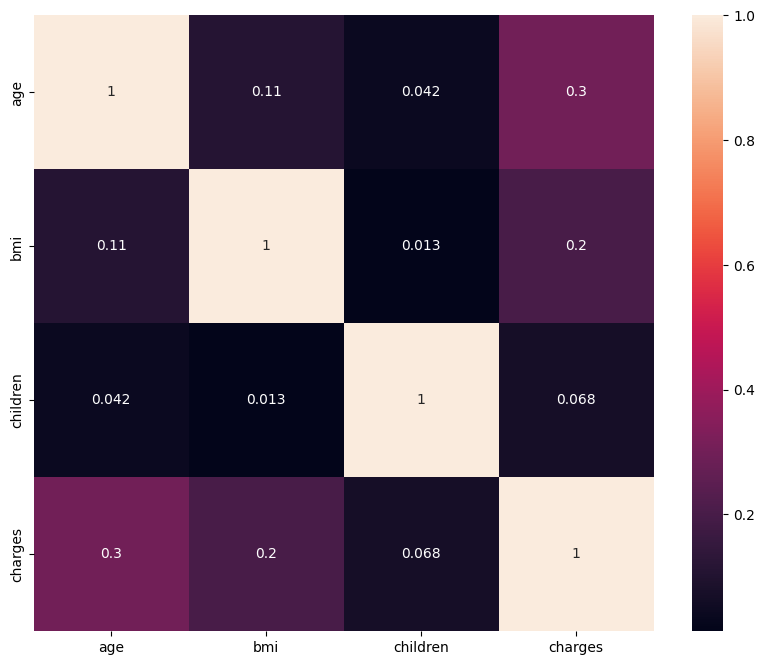

In [ ]:
#Heatmap
#col1 = np.array([1,2,3,1,10,20,1000,15])
#col2 = np.array([20, 40, 60,80,100,25,15,16])
#array = np.column_stack((col1,col2))


#plt.figure(figsize=(10, 8))
#sns.heatmap(array, annot=True)
#plt.show()

# Exclude categorical columns
numerical_data = df.select_dtypes(include=[np.number])

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()


In [ ]:
#Observation
#There is a correlation between BMI and charges
# There is a correlation between Age and Charges

## Section 3: Model Building and Evaluation (20 Marks)
### Q7. Split the dataset into training and testing sets.
- Use an **80-20** or **70-30** split.

In [26]:
# Prepare the data by selecting relevant features
X = df.drop(columns=['sex', 'smoker', 'region'])
y = df['charges']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
X.shape, y.shape

((1338, 7), (1338,))

### Q8. Build a **Linear Regression Model**.
- Train the model using the training dataset.
- Display the model coefficients and intercept.

In [28]:
# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [30]:
model.score(X_train,y_train), model.score(X_test,y_test)

(1.0, 1.0)

### Q9. Evaluate the model on the test dataset.
- Compute **R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)**.


In [31]:
# Calculate performance metrics for both training and test sets
def adjusted_r2(r2, n, k):
    """Calculate the adjusted R²."""
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [32]:
# Training performance
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2(r2_train, len(y_train), X_train.shape[1])

In [33]:
# Test performance
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2(r2_test, len(y_test), X_test.shape[1])

In [34]:
print(f"\nTraining Performance:")
print(f"Mean Absolute Error (MAE): ${mae_train:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_train:.2f}")

print(f"\nTest Performance:")
print(f"Mean Absolute Error (MAE): ${mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_test:.2f}")


Training Performance:
Mean Absolute Error (MAE): $0.00
Root Mean Squared Error (RMSE): $0.00
R-squared (R²): 1.00
Adjusted R-squared (Adj. R²): 1.00

Test Performance:
Mean Absolute Error (MAE): $0.00
Root Mean Squared Error (RMSE): $0.00
R-squared (R²): 1.00
Adjusted R-squared (Adj. R²): 1.00


### Q10. Interpret the Error Metrics.
- Explain the significance of each metric in evaluating model performance.
- What do these values indicate about the model's accuracy?

---

In [ ]:
# Compare training and test performance
print("\nPerformance Comparison:")
print(f"Training vs Test MAE: ${mae_train:.2f} vs ${mae_test:.2f}")
print(f"Training vs Test RMSE: ${rmse_train:.2f} vs ${rmse_test:.2f}")
print(f"Training vs Test R²: {r2_train:.2f} vs {r2_test:.2f}")
print(f"Training vs Test Adj. R²: {adj_r2_train:.2f} vs {adj_r2_test:.2f}")


Performance Comparison:
Training vs Test MAE: $0.00 vs $0.00
Training vs Test RMSE: $0.00 vs $0.00
Training vs Test R²: 1.00 vs 1.00
Training vs Test Adj. R²: 1.00 vs 1.00


#Observations:

#Interpretation:
#The R² and Adj. R² value of 1 indicates that the model perfectly predicts the dependent variable, which suggests a perfect fit.
#The high R² and adjusted R² values for both training and test sets suggest that the model fits the data well and generalizes effectively to new data
#Error Metrics: Both MAE and RMSE are fairly consistent between training and test sets, indicating that the model performs similarly on both datasets.
#The slightly higher error metrics in the training set compared to the test set might be due to overfitting or simply variability in the data.
#No Major Signs of Overfitting: Since the test performance metrics are close to the training metrics, there are no major signs of overfitting.
#The model's ability to predict on unseen data is strong, as evidenced by the similar performance metrics.
#The RMSE of 0 means that the models prediction matches with the actual values

#The heatmap shows strong correlations betwween between BMI and charges and also between Age and Charges
#No missing values were detected in the dataset, which means the data is complete and ready for modeling.

## Section 4: Model Interpretation and Conclusion (10 Marks)
### Q11. Explain the significance of each feature in predicting insurance charges.
- Which features are most impactful?
**Age, smoker, BMI, region and charges**

- How does smoking status affect the charges?
**Charges are high for smokers**

**#Which features are most impactful?**
#Age, smoker, BMI, region and charges

**#How does smoking status affect the charges?**
# Chargers increase for smokers

### Q12. What are the limitations of your model?
- Discuss any assumptions of **Linear Regression** that might not hold in this dataset.
- Suggest improvements for better prediction accuracy.

---

Here are the assumptions:

Normality:
Linear regression assumes that the residuals (the differences between the predicted and actual values) are normally distributed.
Example: If the residuals are skewed or have heavy tails, the statistical tests used to assess the model's significance (like p-values) might be unreliable.


Improvements for better prediction accuracy:
Here's a more detailed breakdown of strategies:

Data Quality and Preparation:
Data Cleaning: Address missing values, outliers, and inconsistencies in your dataset.

Data Preprocessing: Transform data into a suitable format for your chosen model, including scaling, normalization, and encoding categorical variables.

Data Augmentation: If your dataset is small, consider techniques like data augmentation to artificially increase its size and diversity.

Create New Features:
Derive new features from existing ones that might be more informative for your model.

Feature Selection:

Identify and select the most relevant features, removing irrelevant or redundant ones to improve model performance and reduce overfitting.

## Submission Instructions
- Submit the **Jupyter Notebook (.ipynb)** with well-commented code and explanations.
- Provide visualizations and observations for each step.
- Ensure the notebook runs without errors before submission.

**Total Marks: 60**

---